# Árboles de regresión

En esta sección vamos a centrarnos en un tipo de árbol de decisión, el llamado árbol de decisión de regresión.

![](img/data.png)

Aquí vemos un gráfico de dispersión para las variables $x_1$ y $x_2$, y lo que estamos prediciendo es una tercera variable, una variable dependiente que es $y$, la cual no podemos visualizar debido a que esta es simplemente una tabla bidimensional.

Cuando apliquemos el algoritmo, este, dividirá la información en secciones. Veamos:

![](img/data2.png)

Cómo y dónde se llevana cabo estas divisiones está determinador por el algoritmo. Estas divisiones están relacionadas con un concepto llamado entropía de la información.

![](img/tree01.png)

Ahora podemos predecir los valores de una observación según pertecezca a una o a otra sección. Para ello cogeremos las medias de cada celda, y asignaremos ese valor a las futuras observaciones

![](img/data3.png)

Finalmente podemos asignar estos valores a nuestro árbol de decisiones.

![](img/tree02.png)

Aquí detallo como se obtienen o como se llega a las celdas más pequeñas.

* Empezamos con un nodo con todas las observaciones. 
    * Calculamos la media y la varianza de la variable objetivo

* Calculamos la reducción de la varianza para todos los posibles candidatos a variable del siguiente nodo eligiendo la que da máxima reducción de la misma en el nodo

* Para cada nodo hoja comprobamos si:
    * La reducción máxima de la varianza es menor que un valor fijo.
    * El número de observaciones en dicho nodo es menor que un valor fijo.
    
## Ventajas de usar árboles de regresión

* Modela relaciones complejas no lineales
* Fácil de entender
* Aunque falten valores, se puede promediar en el último nodo donde se ha clasificado la observación.
* Permiten seleccionar rasgos descriptivos importantes del dataset.

## Prediciendo el precio de las casas en Boston

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn style
sns.set()

### The Data

In [2]:
data = pd.read_csv('../../datasets/boston/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
y = data[target]

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
regtree = DecisionTreeRegressor(min_samples_split=30,
                               min_samples_leaf=10,
                               random_state=42)
regtree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [8]:
preds = regtree.predict(X)
data['preds'] = preds

Comprobamos las predicciones con el valor real

Veremos que hay predicciones que están repetidas. Esto es así debido a que han caído en el mismo nodo

In [9]:
data[["preds", "medv"]].head(10)

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
5,24.058621,28.7
6,20.811111,22.9
7,20.020833,27.1
8,20.020833,16.5
9,20.020833,18.9


In [16]:
preds.shape

(506,)

In [10]:
myfilter = np.asarray(list(filter(lambda x: x > 0.08 and x < 1,
                                  X.iloc[:,0])))

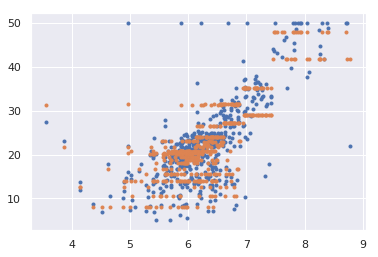

In [18]:
plt.plot(X.iloc[:,5], y, marker='.', linestyle='none')
plt.plot(X.iloc[:,5], preds, marker='.', linestyle='none')
plt.show()

In [12]:
## Validación cruzada

In [13]:
from sklearn.model_selection import KFold, cross_val_score

In [14]:
cv = KFold(n=X.shape[0], n_folds=10,
           shuffle=True, random_state=42)
scores = cross_val_score(regtree, X, y,
                         scoring="neg_mean_squared_error",
                        cv = cv,
                        n_jobs = 1)
score = np.mean(scores)

print("Scores")
print(scores)
print()
print("Score")
print(score)

TypeError: __init__() got an unexpected keyword argument 'n'

Más teoría aquí

In [ ]:
list(zip(predictors, regtree.feature_importances_))